<a href="https://colab.research.google.com/github/NileshCT/Linear_Regression_Modelling/blob/main/Crop_Recommendation_System_Project__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
#Importing the dataset.
df=pd.read_csv("/content/drive/MyDrive/crop (1).csv")

In [4]:
#Exploring top five records from data frame.
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
#Exploring last five records.
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
#Lets explore the shape of the dataframe, here there are 2200 rows and 8 columns.
df.shape

(2200, 8)

In [7]:
#Lets explore the non null values in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
#Lets explore the data type of ecah numeric feature.
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
#Lets explore the ststistical values of numeric feature.
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
#Lets explore the unique records of the dataframe.
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [13]:
#There are 9149 sum of nunique values.
df.nunique().sum()

9149

In [15]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [16]:
#Lets explore the all features of the dataframe.
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [20]:
#Lets explore the sum all null values from dataframe.
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [21]:
df.notnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
2195,True,True,True,True,True,True,True,True
2196,True,True,True,True,True,True,True,True
2197,True,True,True,True,True,True,True,True
2198,True,True,True,True,True,True,True,True


<Axes: >

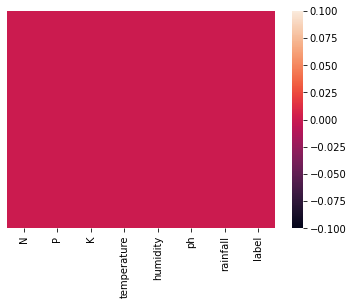

In [24]:
#Lets visualize the heatmap of null values.
sns.heatmap(df.isnull(),cbar=True, yticklabels=False)

In [25]:
#Lets explore the all unique values of label feature.
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [27]:
#Lets explore the duplicate values in the dataframe.There are 0 duplicated values.
df.duplicated().sum()

0

In [29]:
#Lets set a label feature as index,
crop_sum=pd.pivot_table(df,index=["label"],aggfunc="mean")
crop_sum

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [33]:
df['label'].value_counts()[0:10]

rice          100
maize         100
jute          100
cotton        100
coconut       100
papaya        100
orange        100
apple         100
muskmelon     100
watermelon    100
Name: label, dtype: int64

Text(0.5, 0, 'Label')

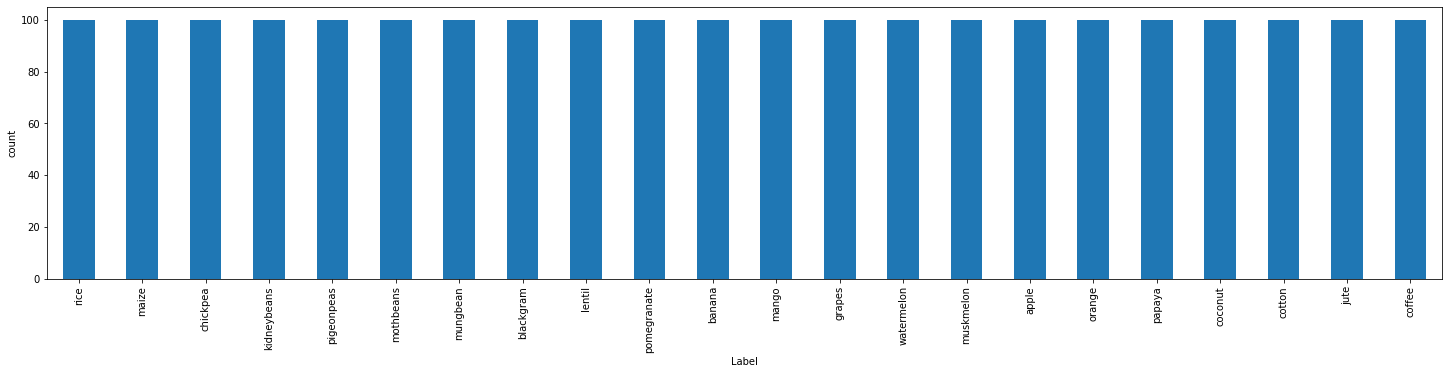

In [35]:
df.label.value_counts().nlargest(40).plot(kind="bar",figsize=(25,5))
plt.ylabel("count")
plt.xlabel("Label")


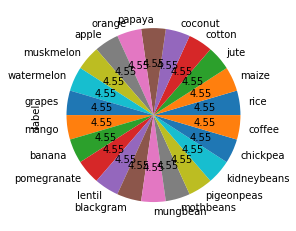

In [38]:
df['label'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<ipython-input-30-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


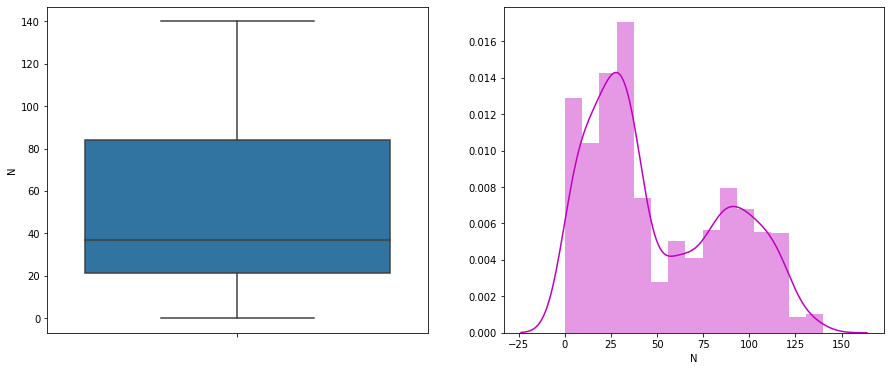

<ipython-input-30-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


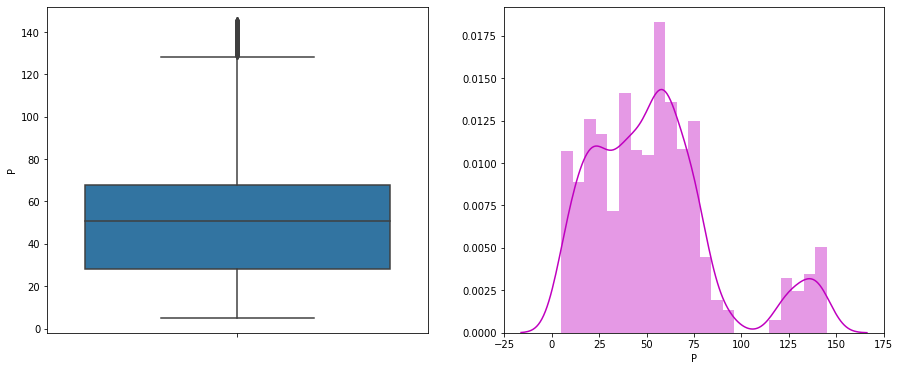

<ipython-input-30-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


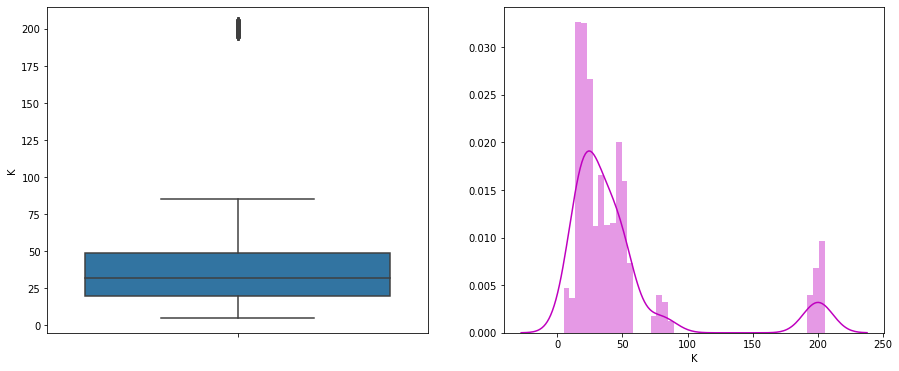

<ipython-input-30-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


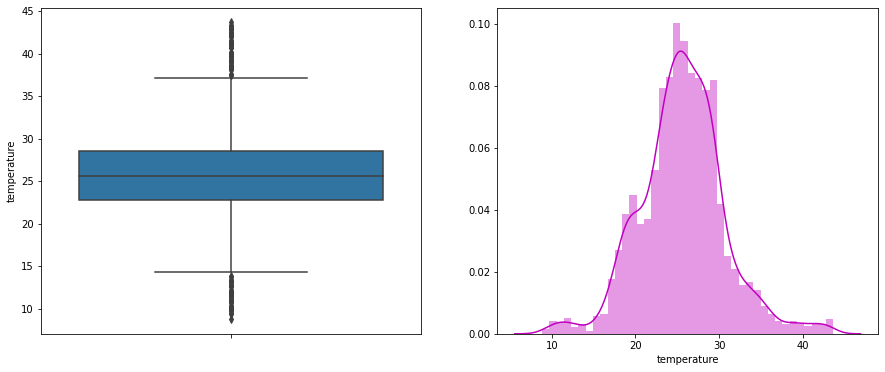

<ipython-input-30-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


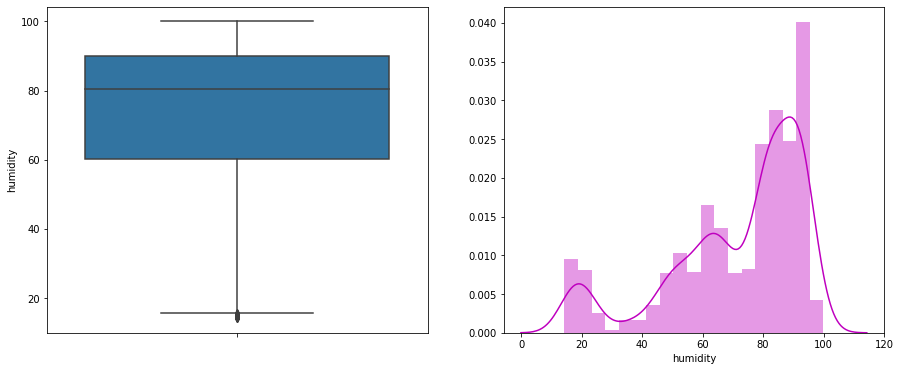

<ipython-input-30-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


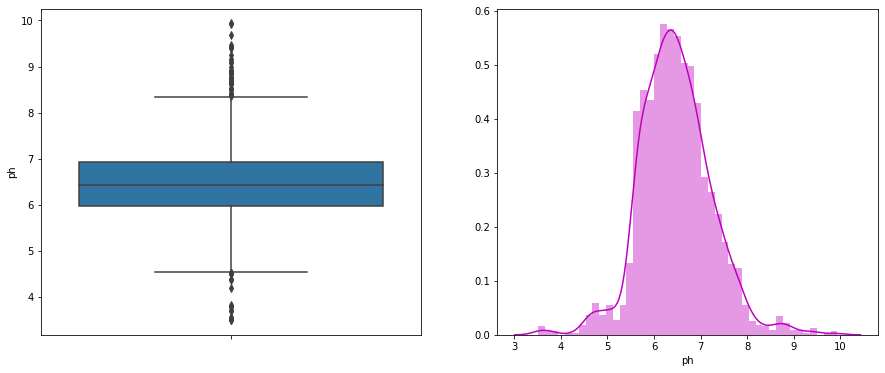

<ipython-input-30-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


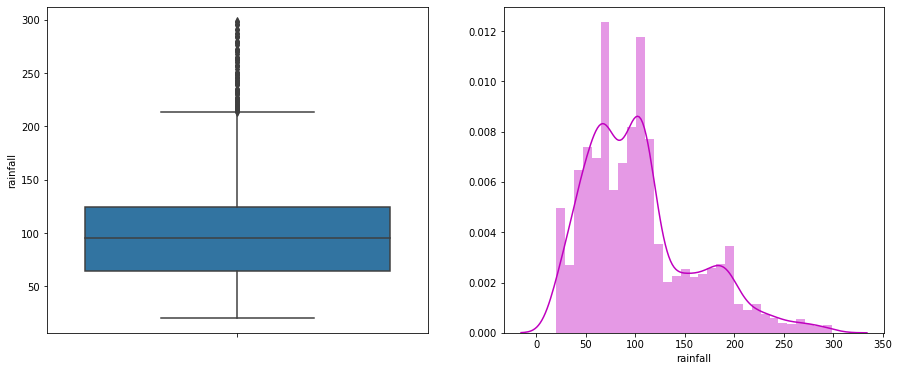

In [30]:
#Box plot with distplot 
numeric_features =df.describe().columns
numeric_features

for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna(),color="m")
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

In [40]:
corr=df.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

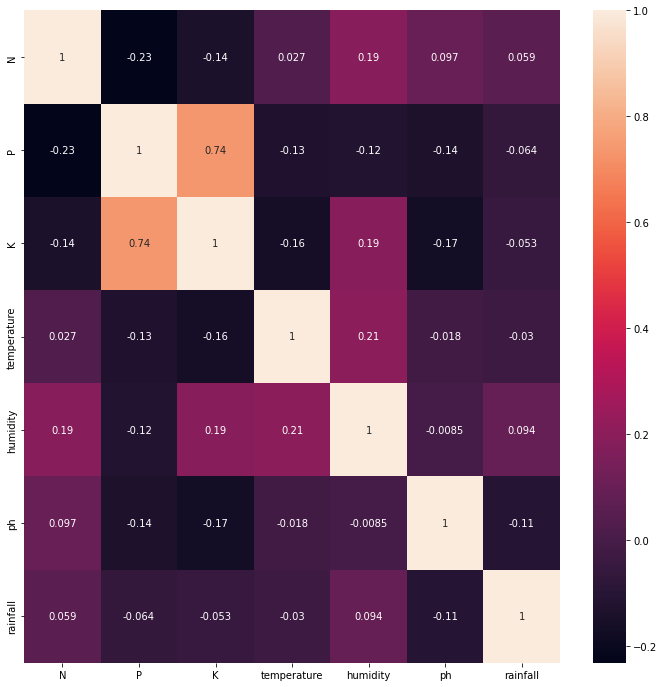

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

In [52]:
X=df.drop("label",axis=1)
y=df["label"]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=0,shuffle = True)

In [56]:
#Here this is classification problem so classifers are used for this tasks like LGBMclassifiers.
#Lets import the this classifier
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [60]:
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_train

array(['apple', 'jute', 'jute', ..., 'blackgram', 'lentil', 'orange'],
      dtype=object)

In [63]:
pip install accuracy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [65]:
pip install confusion-matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 3.9 MB/s eta 0:00:00
  Created wheel for confusion-matrix: filename=confusion_matrix-0.1-py3-none-any.whl size=2421 sha256=b8dcf6c71c73a9b61c59a96389e3dbbbfb95b12b30bca2eaeaf6889978d461a1
  Stored in directory: /root/.cache/pip/wheels/ac/84/3c/16054ec918dfe3851f5e9f8a663b3ada080411784df12e33ec
Successfully built confusion-matrix


In [67]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
pip install scikit-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-metrics: filename=scikit_metrics-0.1.0-py3-none-any.whl size=4418 sha256=994a18d07380ed697d88d052f5de6f690bec07685240f23fb5d4fd9cd0ace3a9
  Stored in directory: /root/.cache/pip/wheels/13/3b/a7/112bfc0158119c9b9629cef6b131dee5d5482f0203f35f80a0
Successfully built scikit-metrics


In [72]:
# #A confusion matrix is used in classification tasks to visualize the performance of an algorithm. 
# It allows us to see if the algorithm is confusing two or more classes and helps us understand how well the algorithm is making correct predictions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [73]:
accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)

1.0


In [75]:
y_pred_test=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_test)
print(accuracy)

0.9931818181818182


In [79]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)

In [82]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [83]:
classifier.predict(X_train)

array(['apple', 'jute', 'jute', ..., 'blackgram', 'lentil', 'orange'],
      dtype=object)

In [86]:
y_pred_train=model.predict(X_train)
accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)

1.0


In [88]:
y_pred_test=model.predict(X_test)
classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_test)
print(accuracy)

0.9931818181818182


In [89]:
from sklearn.ensemble import RandomForestClassifier  
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)